In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from plotData import *
import costFunction as cf
import plotDecisionBoundary as pdb
import predict as predict
from sigmoid import *
plt.ion()
# Load data
# The first two columns contain the exam scores and the third column contains the label.
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = np.array(data[:, 0:2])
y = np.array(data[:, 2])
print("size of X:",X.shape)
print("size of y:",y.shape)

size of X: (100, 2)
size of y: (100,)


Plotting Data with + indicating (y = 1) examples and o indicating (y = 0) examples.
Program paused. Press ENTER to continue


''

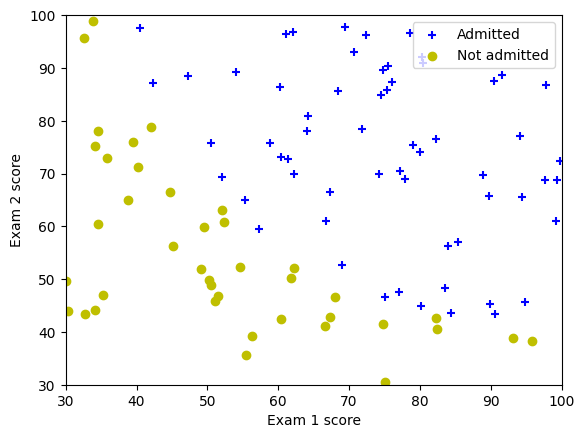

In [18]:
# ===================== Part 1: Plotting =====================
print('Plotting Data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

plot_data(X, y)

plt.axis([30, 100, 30, 100])
plt.legend(['Admitted', 'Not admitted'], loc=1)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

input('Program paused. Press ENTER to continue')

In [48]:
# ===================== Part 2: Compute Cost and Gradient =====================
# In this part of the exercise, you will implement the cost and gradient
# for logistic regression. You need to complete the code in
# costFunction.py

# Setup the data array appropriately, and add ones for the intercept term
(m, n) = X.shape

# Add intercept term
X = np.c_[np.ones(m), X]

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

# Compute and display initial cost and gradient
cost, grad = cf.cost_function(initial_theta, X, y)

np.set_printoptions(formatter={'float': '{: 0.4f}\n'.format})

print('Cost at initial theta (zeros): {:0.3f}'.format(cost))
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): \n{}'.format(grad))
print('Expected gradients (approx): \n-0.1000\n-12.0092\n-11.2628')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cf.cost_function(test_theta, X, y)

print('Cost at test theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.218')
print('Gradient at test theta: \n{}'.format(grad))
print('Expected gradients (approx): \n0.043\n2.566\n2.647')

input('Program paused. Press ENTER to continue')



Cost at initial theta (zeros): 0.139
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
-23.372058794804744
Expected gradients (approx): 
-0.1000
-12.0092
-11.2628
Cost at test theta (zeros): -0.10879339732583519
Expected cost (approx): 0.218
Gradient at test theta: 
5.255934481492723
Expected gradients (approx): 
0.043
2.566
2.647
Program paused. Press ENTER to continue


''

In [51]:
# ===================== Part 3: Optimizing using fmin_bfgs =====================
# In this exercise, you will use a built-in function (opt.fmin_bfgs) to find the
# optimal parameters theta


def cost_func(t):
    return cf.cost_function(t, X, y)[0]


def grad_func(t):
    return cf.cost_function(t, X, y)[1]


# Run fmin_bfgs to obtain the optimal theta
theta, cost, *unused = opt.fmin_bfgs(f=cost_func, fprime=grad_func, x0=initial_theta, maxiter=400, full_output=True, disp=False)

print('Cost at theta found by fmin: {:0.4f}'.format(cost))
print('Expected cost (approx): 0.203')
print('theta: \n{}'.format(theta))
print('Expected Theta (approx): \n-25.161\n0.206\n0.201')

# Plot boundary
pdb.plot_decision_boundary(theta, X, y)

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

input('Program paused. Press ENTER to continue')

# ===================== Part 4: Predict and Accuracies =====================
# After learning the parameters, you'll like to use it to predict the outcomes
# on unseen data. In this part, you will use the logistic regression model
# to predict the probability that a student with score 45 on exam 1 and
# score 85 on exam 2 will be admitted
#
# Furthermore, you will compute the training and test set accuracies of our model.
#
# Your task is to complete the code in predict.py

# Predict probability for a student with score 45 on exam 1
# and score 85 on exam 2

prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of {:0.4f}'.format(prob))
print('Expected value : 0.775 +/- 0.002')

# Compute the accuracy on our training set
p = predict.predict(theta, X)

print('Train accuracy: {}'.format(np.mean(y == p) * 100))
print('Expected accuracy (approx): 89.0')

input('ex2 Finished. Press ENTER to exit')


ValueError: shapes (100,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [23]:
neg

array([ 0,  1,  2,  5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35,
       36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67,
       70, 78, 79, 86, 89, 92], dtype=int64)